In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 

In [45]:
def dx(x,y,z):
    return 10*(y-x)

def dy(x,y,z):
    return x*(28-z)-y
    
def dz(x,y,z):
    return x*y - (8/3)*z

def K_4_3D(fx, fy, fz, x, y, z, h):
    Kx = np.zeros(4)
    Ky = np.zeros(4)
    Kz = np.zeros(4)
    
    Kx[0] = fx(x,y,z)
    Ky[0] = fy(x,y,z)
    Kz[0] = fz(x,y,z)
    
    Kx[1] = fx(x + 0.5*Kx[0]*h, y + 0.5*Ky[0]*h, z + 0.5*Kz[0]*h)
    Ky[1] = fy(x + 0.5*Kx[0]*h, y + 0.5*Ky[0]*h, z + 0.5*Kz[0]*h)
    Kz[1] = fz(x + 0.5*Kx[0]*h, y + 0.5*Ky[0]*h, z + 0.5*Kz[0]*h)
    
    Kx[2] = Kx[1]
    Ky[2] = Ky[1]
    Kz[2] = Kz[1]
    
    Kx[3] = fx(x + Kx[2]*h, y + Ky[2]*h, z + Kz[2]*h)
    Ky[3] = fy(x + Kx[2]*h, y + Ky[2]*h, z + Kz[2]*h)
    Kz[3] = fz(x + Kx[2]*h, y + Ky[2]*h, z + Kz[2]*h)
    
    return Kx,Ky,Kz

def Runge_Kutty_3D(x, y, z, h):
    Kx, Ky, Kz = K_4_3D(dx, dy, dz, x, y, z, h)
    
    x_new = x + (1/6)*(Kx[0] + 2*Kx[1] + 2*Kx[2] + Kx[3])*h
    y_new = y + (1/6)*(Ky[0] + 2*Ky[1] + 2*Ky[2] + Ky[3])*h
    z_new = z + (1/6)*(Kz[0] + 2*Kz[1] + 2*Kz[2] + Kz[3])*h
    
    return x_new, y_new, z_new

# Dla 0 <= t <= 20, 500 punktów

In [46]:
t = np.linspace(0,20,500)
h = t[1]-t[0]

x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))

x[0] = 1
y[0] = 1
z[0] = 1

for i in range(1,len(t)):
    x[i],y[i],z[i] = Runge_Kutty_3D(x[i-1],y[i-1],z[i-1],h)

<IPython.core.display.Javascript object>


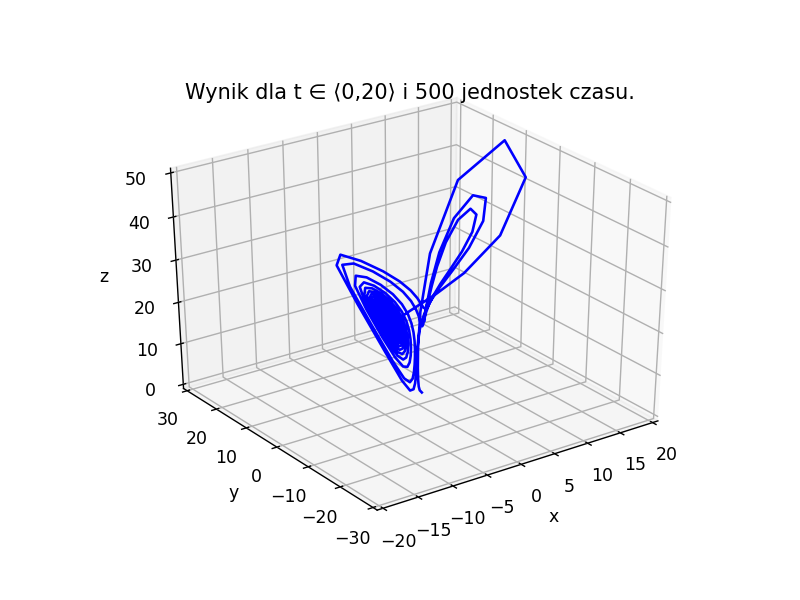

In [47]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'blue')

ax.set_xlim(-20, 20)
ax.set_ylim(-30, 30)
ax.set_zlim(0, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 235)
plt.title('Wynik dla t ∈ ⟨{:.0f},{:.0f}⟩ i {:.0f} jednostek czasu.'.format(t[0],t[-1],len(t)))

plt.show()

# Dla 0 <= t <= 100, 10000 punktów

In [48]:
t = np.linspace(0,100,10000)
h = t[1]-t[0]

x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))

x[0] = 1
y[0] = 1
z[0] = 1

for i in range(1,len(t)):
    x[i],y[i],z[i] = Runge_Kutty_3D(x[i-1],y[i-1],z[i-1],h)

<IPython.core.display.Javascript object>


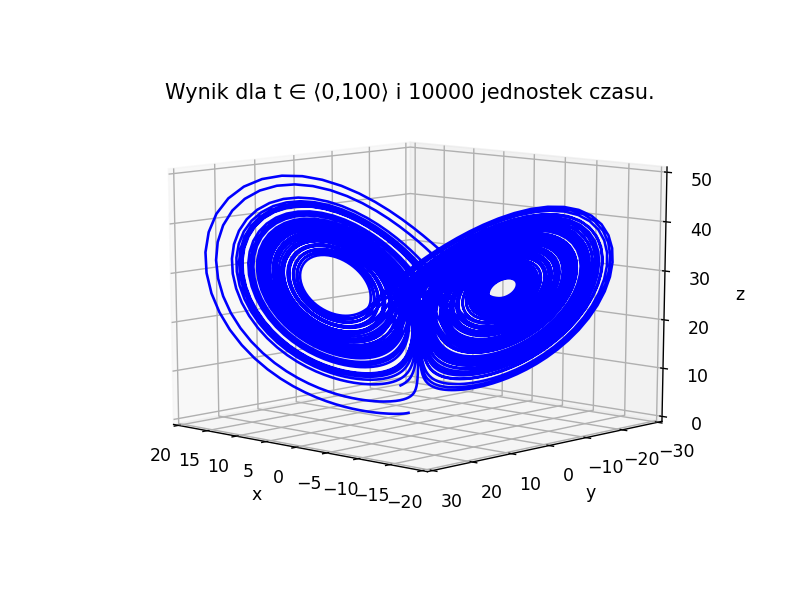

In [49]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'blue')

ax.set_xlim(-20, 20)
ax.set_ylim(-30, 30)
ax.set_zlim(0, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 235)
plt.title('Wynik dla t ∈ ⟨{:.0f},{:.0f}⟩ i {:.0f} jednostek czasu.'.format(t[0],t[-1],len(t)))

plt.show()